En el siguiente notebook, se va a trabajar con los datos con el fin de poder sacar el máximo provecho de los datos de una forma más ordenada, detectando los valores faltantes, los datos duplicados y atípicos para que no afecte de manera negativa al análisis. 


In [1]:
# Se importan las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

sns.set()

In [2]:
# Se cargan los datos de la hoja llamada Velocidad % por prov 
df_internet_vxp = pd.read_excel('../Data/Internet.xlsx', sheet_name='Velocidad % por prov')


In [55]:
df_internet_vxp

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2024,1,Buenos Aires,159.130000
1,2024,1,Capital Federal,229.940000
2,2024,1,Catamarca,91.450000
3,2024,1,Chaco,107.510000
4,2024,1,Chubut,20.500000
...,...,...,...,...
979,2014,1,Santa Cruz,3.315991
980,2014,1,Santa Fe,3.147407
981,2014,1,Santiago Del Estero,2.949472
982,2014,1,Tierra Del Fuego,3.446888


In [4]:
# Se realiza una búsqueda de los valores faltantes
valores_faltantes = df_internet_vxp.isnull().sum()

# Muestra de los valores faltantes
valores_faltantes = valores_faltantes[valores_faltantes > 0]
valores_faltantes


Series([], dtype: int64)

In [5]:
# Verificación de registros duplicados
duplicados = df_internet_vxp.duplicated().sum()
duplicados

np.int64(0)

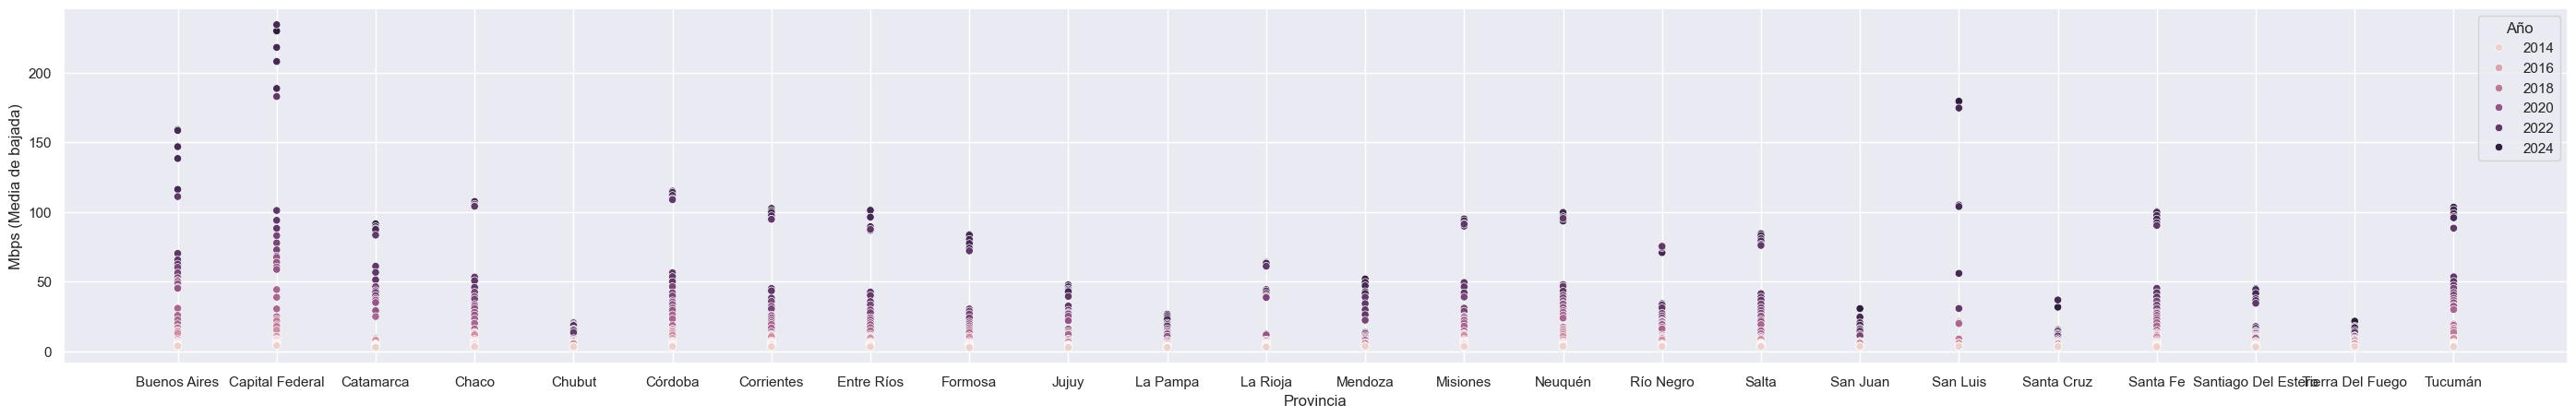

In [6]:
# Se crea un gráfico para comparar el promedio de la velocidad de bajada por cada provincia 

plt.figure(figsize=(35, 5))
sns.scatterplot(data=df_internet_vxp, x='Provincia', y='Mbps (Media de bajada)', hue='Año')
plt.show()


Como se puede observar, en Capital Federal se nota unna bajada muy superior al resto de las provincias de Argentina. y con un fuerte incremento en el último año, seguramente debido a la cantidad de habitantes que hay en la ciudad.

Por otro lado, se ve también cómo en las provincias mas centrales del país el promedio es similar, también con mayor aumento en el último año, y en las provincias del sur argentino el promedio de descarga es mucho menor.

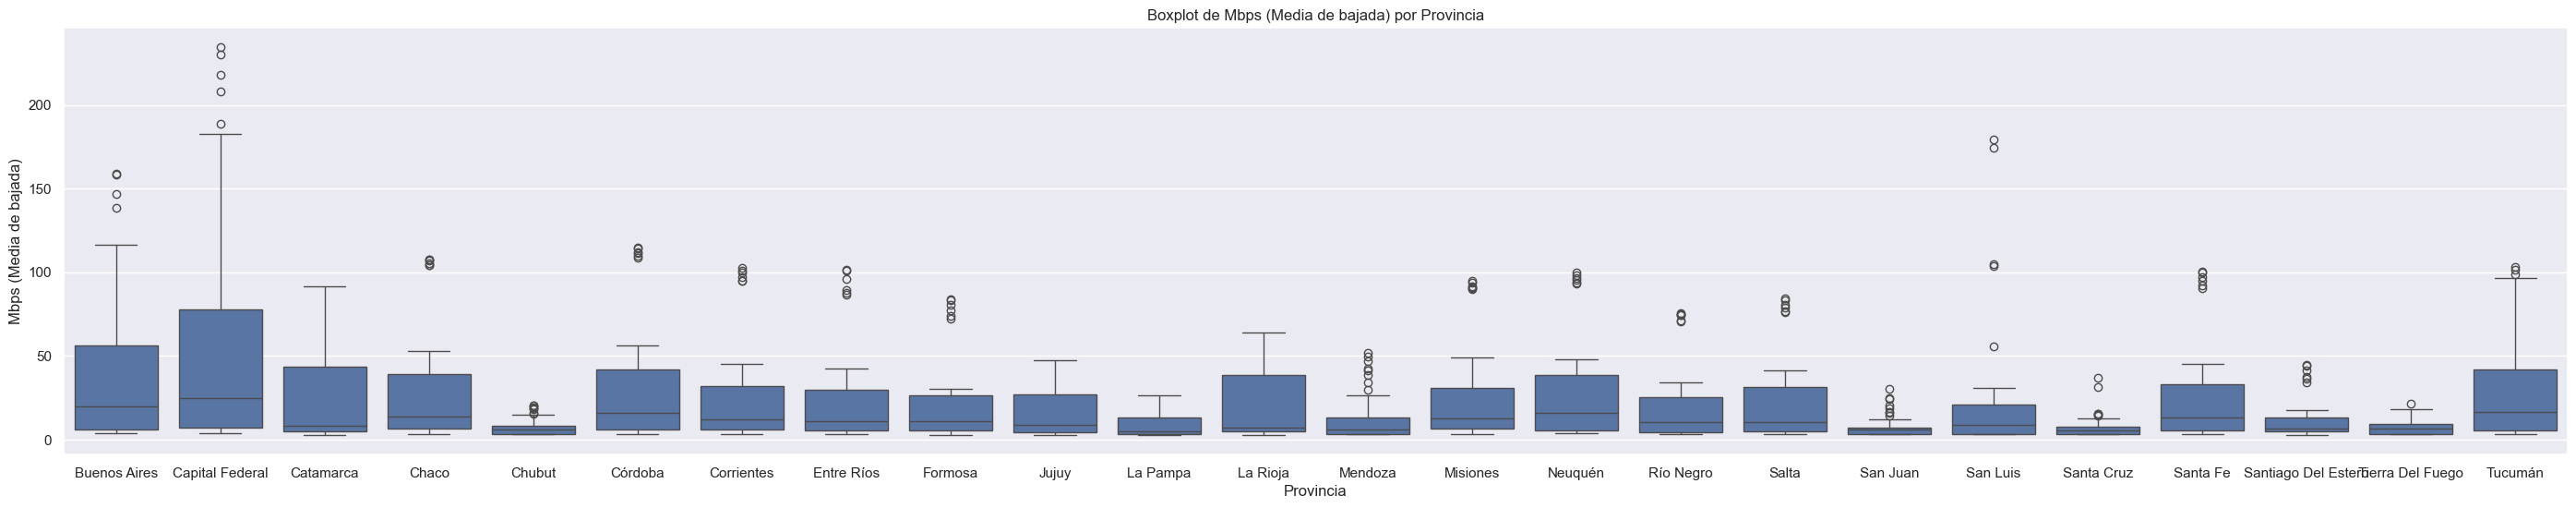

In [57]:
# Crear un boxplot para detectar valores atípicos

plt.figure(figsize=(35, 6))
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=df_internet_vxp)
plt.title('Boxplot de Mbps (Media de bajada) por Provincia')
plt.show()

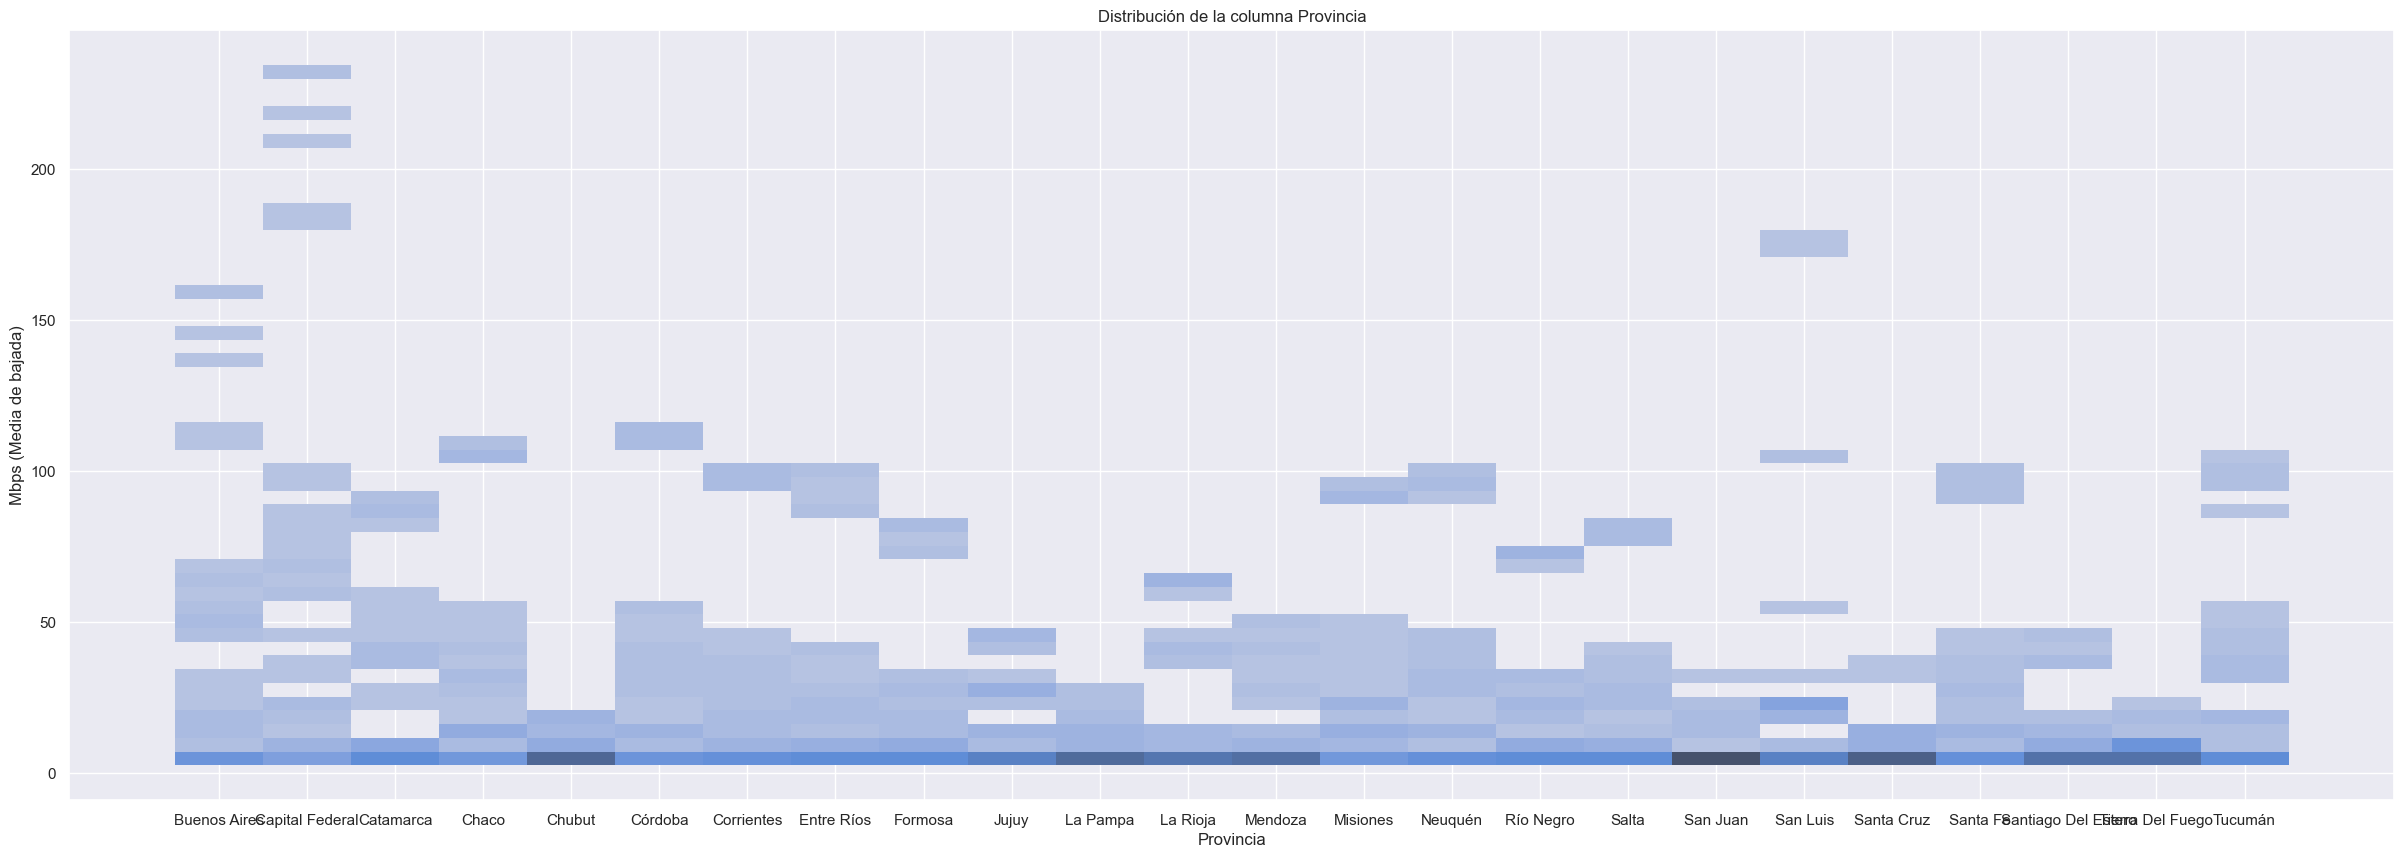

In [8]:
# Histograma de una columna específica

plt.figure(figsize=(30, 10))
sns.histplot(df_internet_vxp, x='Provincia', y='Mbps (Media de bajada)', kde=True)
plt.title('Distribución de la columna Provincia')
plt.show()


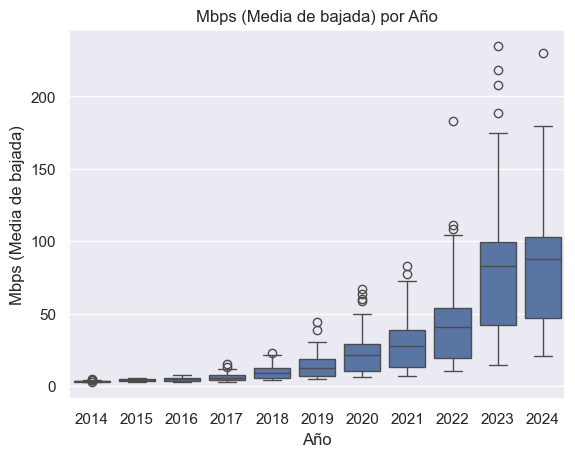

In [51]:
sns.boxplot(x='Año', y='Mbps (Media de bajada)', data=df_internet_vxp)
plt.title('Mbps (Media de bajada) por Año')
plt.show()


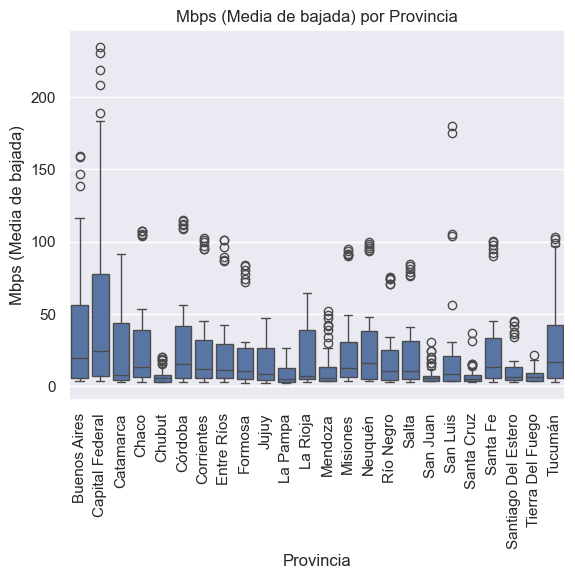

In [53]:
sns.boxplot(x='Provincia', y='Mbps (Media de bajada)', data=df_internet_vxp)
plt.title('Mbps (Media de bajada) por Provincia')
plt.xticks(rotation=90)
plt.show()


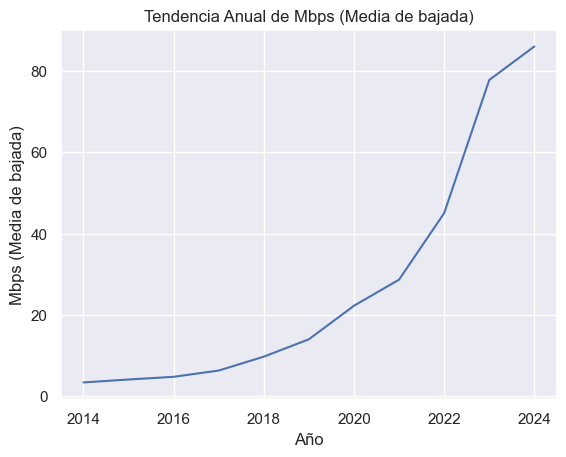

In [54]:
df_internet_vxp.groupby('Año')['Mbps (Media de bajada)'].mean().plot()
plt.title('Tendencia Anual de Mbps (Media de bajada)')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.show()
